# Preparation

In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [2]:
#导入计算table1 整理好的汇总数据
df_raw=pd.read_csv('../data/total.csv')
df_raw=df_raw[['Date','Group_Num','Code','WOR','WTR','Vol','Size','Profitability','EPR']]
df_raw.Date=pd.to_datetime(df_raw.Date)
display(df_raw.head())

,Date,Group_Num,Code,WOR,WTR,Vol,Size,Profitability,EPR
0,2009-03-03,0.0,600718.SH,-0.499369,NaN,0.210875,295325.492124,0.142162,2.852842e+07
1,2009-03-03,0.0,600991.SH,-0.411673,-0.066589,0.200163,96569.256078,0.040064,1.161347e+07
2,2009-03-03,0.0,000425.SZ,-0.407139,0.017674,0.203814,589681.232985,-0.059167,-2.670190e+06
3,2009-03-03,0.0,000560.SZ,-0.278895,-0.185841,0.160781,47291.585650,0.009247,6.588908e+05
4,2009-03-03,0.0,600433.SH,-0.236562,-0.167568,0.190481,30333.600000,-0.058891,-3.167137e+06


# Short persistence of WOR 

In [3]:
df=df_raw[['Code','Date','Group_Num','WOR']]
df=df.sort_values(by=['Code','Date']).reset_index(drop=True)

## 计算$WOR_{w+t}$

In [4]:
#calculate stock return on w+1,w+2,w+3,w+4
#instead of shifting we change the index of stock , equals to shift(-1) on each stock 

w1=df.copy().rename(columns={'WOR':'WOR_1'})
w1.Date=w1.Date-pd.Timedelta(weeks=1)  
w1.drop('Group_Num',axis=1,inplace=True)

w2=df.copy().rename(columns={'WOR':'WOR_2'})
w2.Date=w2.Date-pd.Timedelta(weeks=2)
w2.drop('Group_Num',axis=1,inplace=True)

w3=df.copy().rename(columns={'WOR':'WOR_3'})
w3.Date=w3.Date-pd.Timedelta(weeks=3)
w3.drop('Group_Num',axis=1,inplace=True)

w4=df.copy().rename(columns={'WOR':'WOR_4'})
w4.Date=w4.Date-pd.Timedelta(weeks=4)
w4.drop('Group_Num',axis=1,inplace=True)

In [5]:
#WOR_i表示i周后的收益率
df_m=df.merge(w1,how='left').merge(w2,how='left').merge(w3,how='left').merge(w4,how='left')
display(df_m.head())

,Code,Date,Group_Num,WOR,WOR_1,WOR_2,WOR_3,WOR_4
0,000001.SZ,2009-03-03,0.0,-0.185929,-0.010132,0.026351,-0.008496,-0.025068
1,000001.SZ,2009-03-10,5.0,-0.010132,0.026351,-0.008496,-0.025068,0.014501
2,000001.SZ,2009-03-17,7.0,0.026351,-0.008496,-0.025068,0.014501,0.000214
3,000001.SZ,2009-03-24,1.0,-0.008496,-0.025068,0.014501,0.000214,-0.027641
4,000001.SZ,2009-03-31,4.0,-0.025068,0.014501,0.000214,-0.027641,0.005926


In [6]:
#计算每周每个小组的平均收益率，WOR(g,t), g表示小组数，t表示在第几周。小组平均收益率为组内股票收益率的平均数。
temp=df_m.sort_values(by=['Date','Group_Num']).reset_index(drop=True)
df_group=temp.groupby(['Date',pd.Grouper(key='Group_Num')]).mean().reset_index() 
display(df_group.head())

,Date,Group_Num,WOR,WOR_1,WOR_2,WOR_3,WOR_4
0,2009-03-03,0.0,-0.135220,-0.013322,0.014892,0.017902,-0.021886
1,2009-03-03,1.0,-0.083087,-0.013538,0.016886,0.016443,-0.023550
2,2009-03-03,2.0,-0.065233,-0.016079,0.011182,0.015286,-0.016116
3,2009-03-03,3.0,-0.054918,-0.013144,0.016804,0.016813,-0.016824
4,2009-03-03,4.0,-0.047788,-0.010712,0.013309,0.017546,-0.018772


In [7]:
#计算每个小组的平均收益率， 𝑊𝑂𝑅(𝑔) ,g表示小组数。小组平均收益率为 𝑊𝑂𝑅𝑔,𝑡 的算术平均数
table2a=df_group.groupby('Group_Num').mean()  #at the begining we just calculate the mean, but not *5
display(table2a)

,WOR,WOR_1,WOR_2,WOR_3,WOR_4
Group_Num,,,,,
0.0,-0.055077,-0.015043,-0.011520,-0.010792,-0.010256
1.0,-0.026012,-0.008918,-0.008084,-0.008025,-0.007918
2.0,-0.018233,-0.007272,-0.007142,-0.007083,-0.007078
3.0,-0.012928,-0.006230,-0.006079,-0.006203,-0.006646
4.0,-0.008608,-0.005454,-0.005451,-0.005638,-0.006031
5.0,-0.004651,-0.004946,-0.005143,-0.005317,-0.005651
6.0,-0.000553,-0.004397,-0.004924,-0.005397,-0.005398
7.0,0.004550,-0.004215,-0.004675,-0.004686,-0.005095
8.0,0.011990,-0.004044,-0.004586,-0.004864,-0.004618


## 双样本t检验

对第一组和最后一组进行双样本t检验

In [8]:
def ttest(a1,a2):
    if stats.levene(a1, a2)[1]>0.05: #不具备方差奇性
        rst=stats.ttest_ind(a1,a2, equal_var = False)
    else:
        rst=stats.ttest_ind(a1,a2, equal_var = True)
    return rst[0]

In [9]:
label=['WOR','WOR_1','WOR_2','WOR_3','WOR_4']
rst=[]
for i in label:
    a1=np.array(df_group[df_group.Group_Num==9][i].dropna()) 
    a2=np.array(df_group[df_group.Group_Num==0][i].dropna())
    rst.append(round(ttest(a1,a2),4))

In [10]:
#将t检验结果加入到表中
table2a.loc['diff']=table2a.loc[9.0]-table2a.loc[0.0]
table2a.loc['t-statistics']=np.array(rst)
table2a['No. of Obs']=df_raw.Group_Num.value_counts().sort_index()
table2a

,WOR,WOR_1,WOR_2,WOR_3,WOR_4,No. of Obs
Group_Num,,,,,,
0.0,-0.055077,-0.015043,-0.011520,-0.010792,-0.010256,96319.0
1.0,-0.026012,-0.008918,-0.008084,-0.008025,-0.007918,96034.0
2.0,-0.018233,-0.007272,-0.007142,-0.007083,-0.007078,95857.0
3.0,-0.012928,-0.006230,-0.006079,-0.006203,-0.006646,96340.0
4.0,-0.008608,-0.005454,-0.005451,-0.005638,-0.006031,96279.0
5.0,-0.004651,-0.004946,-0.005143,-0.005317,-0.005651,95720.0
6.0,-0.000553,-0.004397,-0.004924,-0.005397,-0.005398,95961.0
7.0,0.004550,-0.004215,-0.004675,-0.004686,-0.005095,95998.0
8.0,0.011990,-0.004044,-0.004586,-0.004864,-0.004618,95984.0


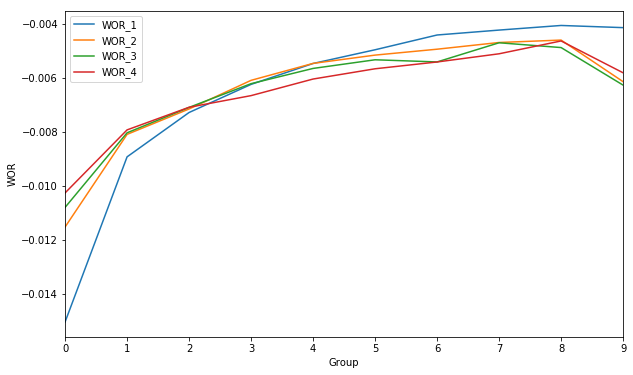

In [11]:
plt.figure(figsize=(10,6))  
for i in range(1,5):
    plt.plot(table2a.iloc[:10,i],label='WOR_'+str(i))
  
plt.xlabel('Group')
plt.ylabel('WOR')
plt.xlim(0,9)
plt.legend()
plt.show()

**结论**

**1. w+1～w+4，第9组高于第0组,差值为0.010919～0.004457，且差值显著为正（t检验）**

**2. 在w+1周，WOR单调递增,在w+2～w+4周，WOR大体呈现上升趋势
上述现象表明WOR存在短期的持续性，和预期相符（情绪引起的order imbalance会持续数周），从持续性角度证明WOR可以作为情绪变量。**

# Short persistence on WTR
为了进行对比，接下去对close-to-close return进行上述操作

## 计算$WTR_{w+t}$

In [12]:
df_wtr=df_raw[['Code','Date','Group_Num','WTR']]
df_wtr=df_wtr.sort_values(by=['Code','Date']).reset_index(drop=True)

In [13]:
#instead of shift we change the index of stock , equals to shift(-1) on each stock 

w1_wtr=df_wtr.copy().rename(columns={'WTR':'WTR_1'})
w1_wtr.Date=w1_wtr.Date-pd.Timedelta(weeks=1)  
w1_wtr.drop('Group_Num',axis=1,inplace=True)

w2_wtr=df_wtr.copy().rename(columns={'WTR':'WTR_2'})
w2_wtr.Date=w2_wtr.Date-pd.Timedelta(weeks=2)
w2_wtr.drop('Group_Num',axis=1,inplace=True)

w3_wtr=df_wtr.copy().rename(columns={'WTR':'WTR_3'})
w3_wtr.Date=w3_wtr.Date-pd.Timedelta(weeks=3)
w3_wtr.drop('Group_Num',axis=1,inplace=True)

w4_wtr=df_wtr.copy().rename(columns={'WTR':'WTR_4'})
w4_wtr.Date=w4_wtr.Date-pd.Timedelta(weeks=4)
w4_wtr.drop('Group_Num',axis=1,inplace=True)

In [14]:
df_m_wtr=df_wtr.merge(w1_wtr,how='left').merge(w2_wtr,how='left').merge(w3_wtr,how='left').merge(w4_wtr,how='left')
display(df_m_wtr.head())

,Code,Date,Group_Num,WTR,WTR_1,WTR_2,WTR_3,WTR_4
0,000001.SZ,2009-03-03,0.0,-0.098732,0.099186,0.070034,-0.013845,0.017230
1,000001.SZ,2009-03-10,5.0,0.099186,0.070034,-0.013845,0.017230,0.044542
2,000001.SZ,2009-03-17,7.0,0.070034,-0.013845,0.017230,0.044542,0.000601
3,000001.SZ,2009-03-24,1.0,-0.013845,0.017230,0.044542,0.000601,-0.052221
4,000001.SZ,2009-03-31,4.0,0.017230,0.044542,0.000601,-0.052221,-0.012033


In [15]:
temp=df_m_wtr.sort_values(by=['Date','Group_Num']).reset_index(drop=True)
df_group_wtr=temp.groupby(['Date',pd.Grouper(key='Group_Num')]).mean().reset_index() 
display(df_group_wtr.head())

,Date,Group_Num,WTR,WTR_1,WTR_2,WTR_3,WTR_4
0,2009-03-03,0.0,-0.120921,0.048229,0.050003,0.069051,0.030597
1,2009-03-03,1.0,-0.106794,0.048120,0.058372,0.055356,0.031375
2,2009-03-03,2.0,-0.102034,0.056428,0.043075,0.059942,0.030337
3,2009-03-03,3.0,-0.094643,0.052988,0.046017,0.060270,0.024761
4,2009-03-03,4.0,-0.089003,0.061825,0.038671,0.063610,0.029420


In [16]:
#计算每个小组的平均收益率， 𝑊𝑂𝑅𝑔，𝑔表示小组数。小组平均收益率为 𝑊𝑂𝑅𝑔,𝑡 的均值
table2b=df_group_wtr.groupby('Group_Num').mean()  #at the begining we just calculate the mean, but not *5
display(table2b)

,WTR,WTR_1,WTR_2,WTR_3,WTR_4
Group_Num,,,,,
0.0,-0.015675,-0.001564,-0.000686,0.000090,0.000142
1.0,-0.005040,0.002571,0.001926,0.001715,0.001240
2.0,-0.003582,0.002909,0.002512,0.002069,0.001634
3.0,-0.002740,0.003075,0.002488,0.002219,0.001663
4.0,-0.001692,0.002991,0.002455,0.002099,0.001973
5.0,-0.000575,0.003131,0.002212,0.001862,0.002084
6.0,0.000723,0.003113,0.002535,0.001761,0.001911
7.0,0.003015,0.002203,0.001923,0.001765,0.001546
8.0,0.008067,0.000894,0.001880,0.001389,0.001473


## 双样本t检验

In [17]:
label=['WTR','WTR_1','WTR_2','WTR_3','WTR_4']
rst=[]
for i in label:
    a1=np.array(df_group_wtr[df_group_wtr.Group_Num==9][i].dropna()) 
    a2=np.array(df_group_wtr[df_group_wtr.Group_Num==0][i].dropna())
    rst.append(round(ttest(a1,a2),4))

In [18]:
#将t检验结果加入到表中
table2b.loc['diff']=table2b.loc[9.0]-table2b.loc[0.0]
table2b.loc['t-statistics']=np.array(rst)
table2b['No. of Obs']=df_raw.Group_Num.value_counts().sort_index()
table2b

,WTR,WTR_1,WTR_2,WTR_3,WTR_4,No. of Obs
Group_Num,,,,,,
0.0,-0.015675,-0.001564,-0.000686,0.000090,0.000142,96319.0
1.0,-0.005040,0.002571,0.001926,0.001715,0.001240,96034.0
2.0,-0.003582,0.002909,0.002512,0.002069,0.001634,95857.0
3.0,-0.002740,0.003075,0.002488,0.002219,0.001663,96340.0
4.0,-0.001692,0.002991,0.002455,0.002099,0.001973,96279.0
5.0,-0.000575,0.003131,0.002212,0.001862,0.002084,95720.0
6.0,0.000723,0.003113,0.002535,0.001761,0.001911,95961.0
7.0,0.003015,0.002203,0.001923,0.001765,0.001546,95998.0
8.0,0.008067,0.000894,0.001880,0.001389,0.001473,95984.0


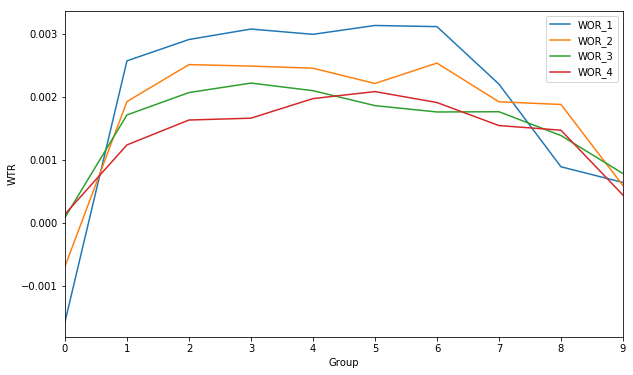

In [19]:
plt.figure(figsize=(10,6))  
for i in range(1,5):
    plt.plot(table2b.iloc[:10,i],label='WOR_'+str(i))
  
plt.xlabel('Group')
plt.ylabel('WTR')
plt.xlim(0,9)
plt.legend()
plt.show()

**结论**<br>

**1. w+1～w+4周，第9组高于第0组,差值为0.0022～0.0003，差值很小，且差值不显著为正，**

**2. w+1～w+4周，WTR_i未呈现明显上升或下降趋势，大体呈倒U形**

**和WTR相比，WOR呈现出显著的持续性，从持续性角度证明了WOR可以表征情绪**